In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ppscore as pps
import numpy as np
import plotly.graph_objects as go

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import plotly.figure_factory as ff
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [18]:
df_transacoes = pd.read_csv("./data/transacoes_fraude.csv")

In [19]:
df_transacoes.drop(columns="Cliente", axis=1, inplace=True)

In [20]:
def classificar_turno(dt):
    hora = dt.hour
    if 6 <= hora < 12:
        return 'manhã'
    elif 12 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 24:
        return 'vespertino'
    else:
        return 'madrugada'

# Certifique-se de converter a coluna para datetime
df_transacoes['Horario da Transacao'] = pd.to_datetime(df_transacoes['Horario da Transacao'])
df_transacoes['Turno'] = df_transacoes['Horario da Transacao'].apply(classificar_turno)

In [21]:
df_transacoes

,Tipo de Transacao,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Horario da Transacao,Classe,Turno
0,Saque,390.39,5446.75,5056.36,2023-03-14 07:29:28.256579,0,manhã
1,Saque,3272.03,12167.89,8895.86,2023-02-12 17:54:09.119410,0,tarde
2,PIX,4905.72,8217.63,3311.91,2023-10-03 17:31:42.087599,0,tarde
3,PIX,3073.23,7833.16,4759.93,2024-05-23 17:57:02.055680,0,tarde
4,PIX,4233.03,6920.82,2687.79,2022-10-07 17:30:36.879557,0,tarde
...,...,...,...,...,...,...,...
12995,Saque,1526.11,9680.53,8154.42,2025-04-25 18:48:03.335688,0,vespertino
12996,PIX,888.23,6677.31,5789.08,2024-10-13 19:31:11.093681,0,vespertino
12997,Saque,4245.13,4926.23,681.10,2023-02-17 22:45:31.584409,0,vespertino
12998,Saque,3880.87,7778.95,3898.08,2024-02-10 18:56:08.194584,0,vespertino


In [4]:
df_transacoes.describe()

,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Classe
count,13000.000000,13000.000000,13000.000000,13000.000000
mean,2511.899952,7547.003386,5035.103435,0.110000
std,1436.446865,3225.212074,2884.967560,0.312902
min,10.000000,95.440000,10.120000,0.000000
25%,1279.412500,5038.805000,2533.727500,0.000000
50%,2525.610000,7538.255000,4997.090000,0.000000
75%,3754.945000,10046.875000,7551.552500,0.000000
max,4999.960000,14897.740000,9999.390000,1.000000


In [5]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cliente                     13000 non-null  object 
 1   Tipo de Transacao           13000 non-null  object 
 2   Valor da Transacao          13000 non-null  float64
 3   Valor Anterior a Transacao  13000 non-null  float64
 4   Valor Apos a Transacao      13000 non-null  float64
 5   Horario da Transacao        13000 non-null  object 
 6   Classe                      13000 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 711.1+ KB


In [7]:
df_transacoes["Tipo de Transacao"].value_counts()

Tipo de Transacao
Débito     3290
PIX        3274
Saque      3244
Crédito    3192
Name: count, dtype: int64

In [8]:
px.box(df_transacoes, x="Classe", y="Valor da Transacao", color="Classe")

In [10]:
px.box(df_transacoes, x="Classe", y="Valor Apos a Transacao", color="Classe")

In [14]:
px.scatter(df_transacoes, x="Tipo de Transacao", y="Valor Apos a Transacao", color="Classe")

In [15]:
px.box(df_transacoes, x="Tipo de Transacao", y="Valor Apos a Transacao", color="Classe")

In [23]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Tipo de Transacao           13000 non-null  object        
 1   Valor da Transacao          13000 non-null  float64       
 2   Valor Anterior a Transacao  13000 non-null  float64       
 3   Valor Apos a Transacao      13000 non-null  float64       
 4   Horario da Transacao        13000 non-null  datetime64[ns]
 5   Classe                      13000 non-null  int64         
 6   Turno                       13000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 711.1+ KB


In [ ]:
cat_cols = ['Tipo de Transacao', 'Horario da Transacao', 'Turno']
num_cols = ['Valor da Transacao', 'Valor Anterior a Transacao', 'Valor Apos a Transacao', 'Classe']
df_transacoes_eda = df_transacoes[num_cols]


<Axes: >

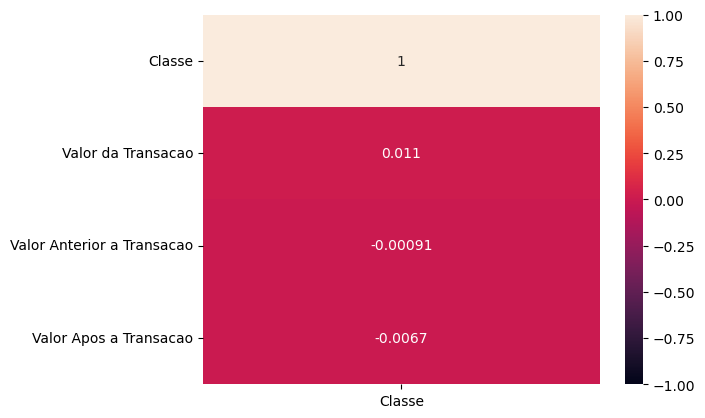

In [31]:
sns.heatmap(df_transacoes_eda.corr()[['Classe']].sort_values(by='Classe', ascending=False), vmax=1, vmin=-1, annot=True)

In [39]:
le = LabelEncoder()
df_transacoes['Turno'] = le.fit_transform(df_transacoes['Turno'])
df_transacoes['Tipo de Transacao'] = le.fit_transform(df_transacoes['Tipo de Transacao'])


In [ ]:
# Correlação de Pearson entre variável codificada e binária
correlacao = df_transacoes['Turno'].corr(df_transacoes['Classe'])

# Teste Qui-quadrado para independência
tabela = pd.crosstab(df_transacoes['Turno'], df_transacoes['Classe'])
chi2, p, dof, ex = chi2_contingency(tabela)

print(f"Teste de qui-quadrado: {chi2}")
print(f"P-value: {p}")

Teste de qui-quadrado: 197.08744625543665
P-value: 1.796641362191022e-42


In [40]:
# Correlação de Pearson entre variável codificada e binária
correlacao = df_transacoes['Tipo de Transacao'].corr(df_transacoes['Classe'])

# Teste Qui-quadrado para independência
tabela = pd.crosstab(df_transacoes['Tipo de Transacao'], df_transacoes['Classe'])
chi2, p, dof, ex = chi2_contingency(tabela)

print(f"Teste de qui-quadrado: {chi2}")
print(f"P-value: {p}")

Teste de qui-quadrado: 8.639030481027978
P-value: 0.03449584944976598


### Resultado do EDA 

Ao que parece pelo testes realizados e o mapa de calor os seguintes parâmetros são significativos:
- Turno da transação é muito significativo
- Tipo da transação é estatísticamente significativo

['Valor da Transacao', 'Valor Anterior a Transacao', 'Valor Apos a Transacao']

In [129]:
cat_cols = ['Turno', 'Tipo de Transacao']
#num_cols = num_cols.remove('Classe')
todas_colunas = cat_cols + num_cols
X = df_transacoes[todas_colunas]
y = df_transacoes['Classe']



scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

preprocessor = ColumnTransformer(transformers=[
    #("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

smote = SMOTE(random_state=32)
tree_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('decisio_tree', DecisionTreeClassifier(
        class_weight='balanced',
        max_depth=6,
        min_samples_split=2,
        min_samples_leaf=1))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

tree_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [130]:
y_prob = tree_model.predict_proba(X_test)[:, 1]  # Probabilidade de ser fraude

# Ajuste o threshold para ser mais sensível a fraudes (ex: 0.3)
threshold = 0.5
y_pred_custom = (y_prob >= threshold).astype(int)

# Calcule as métricas para o novo threshold
accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

cm = confusion_matrix(y_test, y_pred_custom)
labels = ['Not Fraud', 'Fraud']

fig = ff.create_annotated_heatmap(z=cm, x=labels, y=labels, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão', xaxis_title='Predito', yaxis_title='Real')
fig.show()

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.6146
Precision: 0.1488
Recall: 0.5464
F1-score: 0.2339


In [ ]:
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud', 'Fraud']

fig = ff.create_annotated_heatmap(z=cm, x=labels, y=labels, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão', xaxis_title='Predito', yaxis_title='Real')

fig.show()

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.6635
Precision: 0.1545
Recall: 0.4750
F1-score: 0.2331


In [128]:
param_grid = {
    'decisio_tree__max_depth': [6, 8, 10, None],
    'decisio_tree__min_samples_leaf': [1, 5, 10],
    'decisio_tree__min_samples_split': [2, 5, 10],
    'decisio_tree__criterion': ['gini', 'entropy'],
}

grid = GridSearchCV(tree_model, param_grid, scoring={'recall': 'recall', 'accuracy': 'accuracy'}, 
                    refit='recall', cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Melhores parâmetros com base no recall:", grid.best_params_)
print("Melhor recall:", grid.best_score_)

# Para acessar resultados de accuracy:
means_acc = grid.cv_results_['mean_test_accuracy']
params = grid.cv_results_['params']

for mean_acc, param in zip(means_acc, params):
    print(f"Accuracy: {mean_acc:.4f} para parâmetros {param}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Melhores parâmetros com base no recall: {'decisio_tree__criterion': 'gini', 'decisio_tree__max_depth': 6, 'decisio_tree__min_samples_leaf': 1, 'decisio_tree__min_samples_split': 2}
Melhor recall: 0.5469769908616188
Accuracy: 0.6104 para parâmetros {'decisio_tree__criterion': 'gini', 'decisio_tree__max_depth': 6, 'decisio_tree__min_samples_leaf': 1, 'decisio_tree__min_samples_split': 2}
Accuracy: 0.6104 para parâmetros {'decisio_tree__criterion': 'gini', 'decisio_tree__max_depth': 6, 'decisio_tree__min_samples_leaf': 1, 'decisio_tree__min_samples_split': 5}
Accuracy: 0.6104 para parâmetros {'decisio_tree__criterion': 'gini', 'decisio_tree__max_depth': 6, 'decisio_tree__min_samples_leaf': 1, 'decisio_tree__min_samples_split': 10}
Accuracy: 0.6104 para parâmetros {'decisio_tree__criterion': 'gini', 'decisio_tree__max_depth': 6, 'decisio_tree__min_samples_leaf': 5, 'decisio_tree__min_samples_split': 2}
Accuracy: 0.6104 para parâ

## Avaliando resultados

- Tentei equilibrar o recall e o accuracy para que ele detectasse a maioria das fraudes ao mesmo tempo que incomodasse o mínimo de usuários possível.
- Por ser um dataset desbalanceado tive que mexer em alguns hiperparâmetros e usar o smote para possibilitar um treino maior
- Ao meu ver somente duas variáveis importavam para definir se uma transção era fraudulenta ou não que eram o turno que ela foi realizada e o tipo de transação.
- Há limitações no modelo usando decision tree pois ele tem um accuracy de 61% apenas e um recall de 56% e acabanda errando muitos casos eu preferiria fazer um ensamble de regressão logística. Devido ao desbalanceamento dos dados e o fato de eu poder jogar para zero parâmetros irrelevantes.